In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
import pandas
%matplotlib inline

In [73]:
#Constants
rho, rho_i, Patm, g = 1000, 1000, 86, 9.81 #kg/m^3, kPa, m/s^2
#Parameters
k1, k2, k3, k4, k5=  15000, 15000, 10000, 10000, 10000 #whatever units * Q = kPa
#Heights, measured
h_1 = 1 #Between tank B201 and B202
h_2 = 0 #Between tank B202 and first junction
h_3 = 1 #Between last junction and pipe exit

In [74]:
#Tank Volume Constants
R1, R2, R3 = 43/2000, 137/2000, 15/2000
C1 = np.pi*(R1**2 + R2**2 + R1*R2)/3
C2 = np.pi*(R2**2 + R3**2 + R2*R3)/3
A = np.pi*(143.5/1000)**2

In [75]:
def dPa(F1):
    return 150

In [137]:
def DEs(var, t):
    h1, h2 = var
    ss_soln = fsolve(analytical_eqs, [0.01, 0.01, 0.01, 0.01, 0.01, 500], args=(h1, h2))
    F1, F2 = ss_soln[0], ss_soln[1]
    dh1dt = (Fi - F1)/A
    dh2dt = (F1 - F2)/A
    return [dh1dt, dh2dt]

In [138]:
def analytical_eqs(var, h1, h2):
    F1, F2, F3, F4, F5, Pi = var
    H1 = h_1 + h1
    H4 = h_3 + h2
    eq1 = Pi - Patm + rho*g*H1/1000 + k1*F1 - dPa(F1) 
    eq2 = Patm - Pi + k2*F1
    eq3 = -rho*g*H4/1000 + k3*F3
    eq4 = -rho*g*H4/1000 + k4*F4
    eq5 = -rho*g*H4/1000 + k5*F5
    eq6 = F3 + F4 + F5 - F2
    return [eq1, eq2, eq3, eq4, eq5, eq6]

In [139]:
test = fsolve(analytical_eqs, [0.01, 0.01, 0.01, 0.01, 0.01, 100], args=(0.15, 0.15))
test

array([  4.62395000e-03,   3.38445000e-03,   1.12815000e-03,
         1.12815000e-03,   1.12815000e-03,   1.55359250e+02])

In [140]:
print(test[0], "F1")
print(test[1], "F2")
print(test[2], "F3")
print(test[3], "F4")
print(test[4], "F5")
print(test[5], "Pi")

0.00462395 F1
0.00338445 F2
0.00112815 F3
0.00112815 F4
0.00112815 F5
155.35925 Pi


In [151]:
tspan = np.linspace(0, 150, 151)
Fi = 0.00462395
h0_list = [0.15, 0.15]
soln = odeint(DEs, h0_list, tspan)

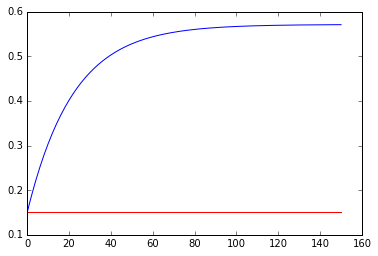

In [152]:
plt.figure()
h1 = soln[:,0]
h2 = soln[:,1]
plt.plot(tspan, h1, 'r-')
plt.plot(tspan, h2, 'b-')